In [ ]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [ ]:
import zipfile
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [ ]:
dataset_path = "dataset/animals"

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')

])

C:\Users\vrooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [ ]:
history=model.fit(train_data, validation_data=val_data,batch_size=100,epochs=10)

C:\Users\vrooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5425 - loss: 1.1510 - val_accuracy: 0.6700 - val_loss: 0.6083
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 572ms/step - accuracy: 0.7866 - loss: 0.5011 - val_accuracy: 0.7450 - val_loss: 0.5088
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 572ms/step - accuracy: 0.8437 - loss: 0.3542 - val_accuracy: 0.8200 - val_loss: 0.3922
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 584ms/step - accuracy: 0.9306 - loss: 0.1830 - val_accuracy: 0.8250 - val_loss: 0.3474
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 833ms/step - accuracy: 0.9817 - loss: 0.0857 - val_accuracy: 0.8800 - val_loss: 0.3329
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 0.0267 - val_accuracy: 0.8850 - val_loss: 0.3398
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 921ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.8900 - val_loss: 0.3470
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 

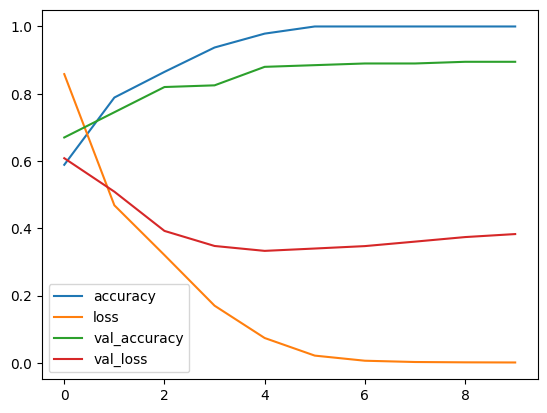

,accuracy,loss,val_accuracy,val_loss
0,0.58875,0.858344,0.670,0.608349
1,0.78875,0.468352,0.745,0.508835
2,0.86500,0.320302,0.820,0.392202
3,0.93750,0.169876,0.825,0.347411
4,0.97875,0.073799,0.880,0.332861


In [ ]:
h= pd.DataFrame(history.history)
h.plot()

plt.show()
h.head()

In [ ]:
# Path of the image you want to test

img_path = r"C:\Users\vrooo\OneDrive\Pictures\Screenshots\Screenshot 2025-10-24 212523.png"
 
img = image.load_img(img_path, target_size=(128, 128))  # same size as training
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # add batch dimension
x = x / 255.0  # normalize

# Predict
prediction = model.predict(x)

# Show result
if prediction[0][0] > 0.5:
    print("🐶 Predicted: Dog")
else:
    print("🐱 Predicted: Cat")

print(f"Confidence Score: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
🐱 Predicted: Cat
Confidence Score: 0.0001
